In [37]:
# install fitur scraper
!pip install google-play-scraper

In [38]:
import pandas as pd
import numpy as np
from google_play_scraper import Sort, reviews
import joblib

In [39]:
# scraping data gojek di play store
result, continuation_token = reviews(
    'com.gojek.app',
    lang='id', # bahasa indonesia
    country='id', # negara
    sort=Sort.MOST_RELEVANT, # sorting data yang paling relevan
    count=8000, # jumlah dataset
    filter_score_with=None
)

In [40]:
# dataframe dengan nama
data=pd.DataFrame(np.array(result),columns=['review'])
data=data.join(pd.DataFrame(data.pop('review').tolist()))
data.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,595da86c-acc1-4a64-ae43-90ff85eaf53d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terlalu terlalu terlalu... apk yg tidak bisa d...,1,1,4.31.1,2022-04-21 13:37:07,"Hai, mohon maaf atas kendala yang kamu alami. ...",2022-04-22 01:33:31,4.31.1
1,2bea7a81-60bc-442a-9d54-fc14eef525c2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sy order melalui gofood dg metode pembayaran m...,1,27,5.20.1,2025-06-20 05:54:24,Hai Kak Nurul. Pastikan internetmu stabil dan ...,2025-06-20 06:10:39,5.20.1
2,585d6cbc-7a6a-447b-bee4-7b9eb632a3ce,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya bagus kok kalo malam pengen makan ...,5,29,5.20.1,2025-06-18 04:59:14,None,NaT,5.20.1
3,1149391b-9d99-4ea3-9cc5-88ce499100fe,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terkadang UI terlihat seperti booking dibatalk...,1,4,5.20.1,2025-06-17 09:40:58,"Hai Kak @Rayh, mohon maaf atas ketidaknyamanan...",2025-06-17 23:13:23,5.20.1
4,5488ebde-7210-4fec-b80f-1136078fe32c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kalau ketentuan untuk semua Gocar, bisa ditera...",4,151,5.17.1,2025-04-29 14:35:12,"Hai Kak Jerry, mohon maaf atas ketidaknyamanan...",2025-02-11 08:42:20,5.17.1
5,ab1e5431-d93e-4a71-a9ef-89a27c7f0b04,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"saya kecewa dg layanan gojek, padahal saya mau...",1,34,5.20.1,2025-06-15 06:33:31,"Hai Kak Norma, mohon maaf atas ketidaknyamanan...",2025-06-15 07:26:19,5.20.1
6,8717a720-1d37-4271-b832-e102f77cfbe2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pengalaman buruk dan kecewa ketika pesan Go Ca...,2,5,5.20.1,2025-06-19 02:18:48,"Hai Kak Tini, mohon maaf atas ketidaknyamanann...",2025-06-21 02:49:12,5.20.1
7,515bd288-e77b-4a97-8284-bb290a3dadb1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,pesanan gomart ada item yang tidak ada. langsu...,1,31,5.20.1,2025-06-04 12:48:15,"Hai, Kak Shella. Mohon maaf atas hal ini. Sebe...",2025-06-04 13:10:02,5.20.1
8,1f8bbf63-a405-4165-ab73-aa3f719eaa70,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya lebih memakai Gofood di Aplikasi ini. Gof...,5,52,5.20.1,2025-06-21 15:56:56,None,NaT,5.20.1
9,3a09fda0-b467-418a-845f-9c9d9be7fda3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"saya udah pernah login gojek, trs tiba"" disuru...",1,4,5.20.1,2025-06-19 07:21:35,"Hai Kak Auliu, mohon maaf atas kendala yang ka...",2025-06-19 07:33:00,5.20.1


In [41]:
# menghapus kolom-kolom yang tidak di butuhkan
data.drop(data.columns[[0,1,2,5,6,7,8,9,10]], axis=1, inplace=True)
data.head(10)

,content,score
0,terlalu terlalu terlalu... apk yg tidak bisa d...,1
1,Sy order melalui gofood dg metode pembayaran m...,1
2,Aplikasinya bagus kok kalo malam pengen makan ...,5
3,terkadang UI terlihat seperti booking dibatalk...,1
4,"Kalau ketentuan untuk semua Gocar, bisa ditera...",4
5,"saya kecewa dg layanan gojek, padahal saya mau...",1
6,Pengalaman buruk dan kecewa ketika pesan Go Ca...,2
7,pesanan gomart ada item yang tidak ada. langsu...,1
8,saya lebih memakai Gofood di Aplikasi ini. Gof...,5
9,"saya udah pernah login gojek, trs tiba"" disuru...",1


In [42]:
import re

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = text.lower()  # Ubah ke lowercase
    text = re.sub(r'\s+', ' ', text)  # Hapus spasi berlebih
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    return text

# Apply clean_text to the 'content' column (or the appropriate column name)
data['cleaned_review'] = data['content'].apply(clean_text)
data.head(10)

,content,score,cleaned_review
0,terlalu terlalu terlalu... apk yg tidak bisa d...,1,terlalu terlalu terlalu apk yg tidak bisa di p...
1,Sy order melalui gofood dg metode pembayaran m...,1,sy order melalui gofood dg metode pembayaran m...
2,Aplikasinya bagus kok kalo malam pengen makan ...,5,aplikasinya bagus kok kalo malam pengen makan ...
3,terkadang UI terlihat seperti booking dibatalk...,1,terkadang ui terlihat seperti booking dibatalk...
4,"Kalau ketentuan untuk semua Gocar, bisa ditera...",4,kalau ketentuan untuk semua gocar bisa diterap...
5,"saya kecewa dg layanan gojek, padahal saya mau...",1,saya kecewa dg layanan gojek padahal saya mau ...
6,Pengalaman buruk dan kecewa ketika pesan Go Ca...,2,pengalaman buruk dan kecewa ketika pesan go ca...
7,pesanan gomart ada item yang tidak ada. langsu...,1,pesanan gomart ada item yang tidak ada langsun...
8,saya lebih memakai Gofood di Aplikasi ini. Gof...,5,saya lebih memakai gofood di aplikasi ini gofo...
9,"saya udah pernah login gojek, trs tiba"" disuru...",1,saya udah pernah login gojek trs tiba disuruh ...


In [43]:
# Case Folding
def case_fold(text):
    # Mengubah teks menjadi huruf kecil
    return text.lower()

# Menerapkan case folding
data['case_folded'] = data['cleaned_review'].apply(case_fold)
print("\nHasil Case Folding:")
print(data[['cleaned_review', 'case_folded']])


Hasil Case Folding:
                                         cleaned_review  \
0     terlalu terlalu terlalu apk yg tidak bisa di p...   
1     sy order melalui gofood dg metode pembayaran m...   
2     aplikasinya bagus kok kalo malam pengen makan ...   
3     terkadang ui terlihat seperti booking dibatalk...   
4     kalau ketentuan untuk semua gocar bisa diterap...   
...                                                 ...   
7995  iyalah makin mahal karena ada biaya layanan ap...   
7996  tolong kepada pihak gojek untuk lebih selektif...   
7997  dari kemarin mo pakai aplikasi ga bisa terus u...   
7998  salah top up ke nomer yg udah nggak aktif hera...   
7999  saya suka aplikasi ini murah cepat dan memudah...   

                                            case_folded  
0     terlalu terlalu terlalu apk yg tidak bisa di p...  
1     sy order melalui gofood dg metode pembayaran m...  
2     aplikasinya bagus kok kalo malam pengen makan ...  
3     terkadang ui terlihat seperti bo

In [44]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Tokenisasi
data['tokens'] = data['cleaned_review'].apply(word_tokenize)
data.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,cleaned_review,case_folded,tokens
0,terlalu terlalu terlalu... apk yg tidak bisa d...,1,terlalu terlalu terlalu apk yg tidak bisa di p...,terlalu terlalu terlalu apk yg tidak bisa di p...,"[terlalu, terlalu, terlalu, apk, yg, tidak, bi..."
1,Sy order melalui gofood dg metode pembayaran m...,1,sy order melalui gofood dg metode pembayaran m...,sy order melalui gofood dg metode pembayaran m...,"[sy, order, melalui, gofood, dg, metode, pemba..."
2,Aplikasinya bagus kok kalo malam pengen makan ...,5,aplikasinya bagus kok kalo malam pengen makan ...,aplikasinya bagus kok kalo malam pengen makan ...,"[aplikasinya, bagus, kok, kalo, malam, pengen,..."
3,terkadang UI terlihat seperti booking dibatalk...,1,terkadang ui terlihat seperti booking dibatalk...,terkadang ui terlihat seperti booking dibatalk...,"[terkadang, ui, terlihat, seperti, booking, di..."
4,"Kalau ketentuan untuk semua Gocar, bisa ditera...",4,kalau ketentuan untuk semua gocar bisa diterap...,kalau ketentuan untuk semua gocar bisa diterap...,"[kalau, ketentuan, untuk, semua, gocar, bisa, ..."
5,"saya kecewa dg layanan gojek, padahal saya mau...",1,saya kecewa dg layanan gojek padahal saya mau ...,saya kecewa dg layanan gojek padahal saya mau ...,"[saya, kecewa, dg, layanan, gojek, padahal, sa..."
6,Pengalaman buruk dan kecewa ketika pesan Go Ca...,2,pengalaman buruk dan kecewa ketika pesan go ca...,pengalaman buruk dan kecewa ketika pesan go ca...,"[pengalaman, buruk, dan, kecewa, ketika, pesan..."
7,pesanan gomart ada item yang tidak ada. langsu...,1,pesanan gomart ada item yang tidak ada langsun...,pesanan gomart ada item yang tidak ada langsun...,"[pesanan, gomart, ada, item, yang, tidak, ada,..."
8,saya lebih memakai Gofood di Aplikasi ini. Gof...,5,saya lebih memakai gofood di aplikasi ini gofo...,saya lebih memakai gofood di aplikasi ini gofo...,"[saya, lebih, memakai, gofood, di, aplikasi, i..."
9,"saya udah pernah login gojek, trs tiba"" disuru...",1,saya udah pernah login gojek trs tiba disuruh ...,saya udah pernah login gojek trs tiba disuruh ...,"[saya, udah, pernah, login, gojek, trs, tiba, ..."


In [45]:
import nltk
from nltk.corpus import stopwords

# Download Indonesian stop words
try:
    stop_words = set(stopwords.words('indonesian'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    # Menghilangkan stopwords
    return [word for word in tokens if word not in stop_words]

# Menerapkan filtering
data['filtered_tokens'] = data['tokens'].apply(remove_stopwords)
print("\nHasil Filtering (Stopwords Removal):")
print(data[['tokens', 'filtered_tokens']])
data.head(10)


Hasil Filtering (Stopwords Removal):
                                                 tokens  \
0     [terlalu, terlalu, terlalu, apk, yg, tidak, bi...   
1     [sy, order, melalui, gofood, dg, metode, pemba...   
2     [aplikasinya, bagus, kok, kalo, malam, pengen,...   
3     [terkadang, ui, terlihat, seperti, booking, di...   
4     [kalau, ketentuan, untuk, semua, gocar, bisa, ...   
...                                                 ...   
7995  [iyalah, makin, mahal, karena, ada, biaya, lay...   
7996  [tolong, kepada, pihak, gojek, untuk, lebih, s...   
7997  [dari, kemarin, mo, pakai, aplikasi, ga, bisa,...   
7998  [salah, top, up, ke, nomer, yg, udah, nggak, a...   
7999  [saya, suka, aplikasi, ini, murah, cepat, dan,...   

                                        filtered_tokens  
0     [apk, yg, percaya, kuota, cepat, abis, update,...  
1     [sy, order, gofood, dg, metode, pembayaran, mb...  
2     [aplikasinya, bagus, kalo, malam, pengen, maka...  
3     [terkadang, ui,

,content,score,cleaned_review,case_folded,tokens,filtered_tokens
0,terlalu terlalu terlalu... apk yg tidak bisa d...,1,terlalu terlalu terlalu apk yg tidak bisa di p...,terlalu terlalu terlalu apk yg tidak bisa di p...,"[terlalu, terlalu, terlalu, apk, yg, tidak, bi...","[apk, yg, percaya, kuota, cepat, abis, update,..."
1,Sy order melalui gofood dg metode pembayaran m...,1,sy order melalui gofood dg metode pembayaran m...,sy order melalui gofood dg metode pembayaran m...,"[sy, order, melalui, gofood, dg, metode, pemba...","[sy, order, gofood, dg, metode, pembayaran, mb..."
2,Aplikasinya bagus kok kalo malam pengen makan ...,5,aplikasinya bagus kok kalo malam pengen makan ...,aplikasinya bagus kok kalo malam pengen makan ...,"[aplikasinya, bagus, kok, kalo, malam, pengen,...","[aplikasinya, bagus, kalo, malam, pengen, maka..."
3,terkadang UI terlihat seperti booking dibatalk...,1,terkadang ui terlihat seperti booking dibatalk...,terkadang ui terlihat seperti booking dibatalk...,"[terkadang, ui, terlihat, seperti, booking, di...","[terkadang, ui, booking, dibatalkan, order, di..."
4,"Kalau ketentuan untuk semua Gocar, bisa ditera...",4,kalau ketentuan untuk semua gocar bisa diterap...,kalau ketentuan untuk semua gocar bisa diterap...,"[kalau, ketentuan, untuk, semua, gocar, bisa, ...","[ketentuan, gocar, diterapkan, kyk, peraturan,..."
5,"saya kecewa dg layanan gojek, padahal saya mau...",1,saya kecewa dg layanan gojek padahal saya mau ...,saya kecewa dg layanan gojek padahal saya mau ...,"[saya, kecewa, dg, layanan, gojek, padahal, sa...","[kecewa, dg, layanan, gojek, membatalkan, pesa..."
6,Pengalaman buruk dan kecewa ketika pesan Go Ca...,2,pengalaman buruk dan kecewa ketika pesan go ca...,pengalaman buruk dan kecewa ketika pesan go ca...,"[pengalaman, buruk, dan, kecewa, ketika, pesan...","[pengalaman, buruk, kecewa, pesan, go, car, pu..."
7,pesanan gomart ada item yang tidak ada. langsu...,1,pesanan gomart ada item yang tidak ada langsun...,pesanan gomart ada item yang tidak ada langsun...,"[pesanan, gomart, ada, item, yang, tidak, ada,...","[pesanan, gomart, item, langsung, dikurangin, ..."
8,saya lebih memakai Gofood di Aplikasi ini. Gof...,5,saya lebih memakai gofood di aplikasi ini gofo...,saya lebih memakai gofood di aplikasi ini gofo...,"[saya, lebih, memakai, gofood, di, aplikasi, i...","[memakai, gofood, aplikasi, gofood, nya, cepat..."
9,"saya udah pernah login gojek, trs tiba"" disuru...",1,saya udah pernah login gojek trs tiba disuruh ...,saya udah pernah login gojek trs tiba disuruh ...,"[saya, udah, pernah, login, gojek, trs, tiba, ...","[udah, login, gojek, trs, disuruh, update, uda..."


In [46]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words('indonesian'))

def stem_text(tokens):
    # Mengubah kata-kata ke bentuk dasar
    return [stemmer.stem(word) for word in tokens]

# Menerapkan stemming
data['stemmed_tokens'] = data['filtered_tokens'].apply(stem_text)
print("\nHasil Stemming:")
print(data[['filtered_tokens', 'stemmed_tokens']])
data.head(10)


Hasil Stemming:
                                        filtered_tokens  \
0     [apk, yg, percaya, kuota, cepat, abis, update,...   
1     [sy, order, gofood, dg, metode, pembayaran, mb...   
2     [aplikasinya, bagus, kalo, malam, pengen, maka...   
3     [terkadang, ui, booking, dibatalkan, order, di...   
4     [ketentuan, gocar, diterapkan, kyk, peraturan,...   
...                                                 ...   
7995  [iyalah, mahal, biaya, layanan, aplikasilah, b...   
7996  [tolong, gojek, selektif, membimbing, mintrany...   
7997  [kemarin, mo, pakai, aplikasi, ga, udah, updat...   
7998  [salah, top, up, nomer, yg, udah, nggak, aktif...   
7999  [suka, aplikasi, murah, cepat, memudahkan, per...   

                                         stemmed_tokens  
0     [apk, yg, percaya, kuota, cepat, abis, update,...  
1     [sy, order, gofood, dg, metode, bayar, mbankin...  
2     [aplikasi, bagus, kalo, malam, ken, makan, rum...  
3     [terkadang, ui, booking, batal, orde

,content,score,cleaned_review,case_folded,tokens,filtered_tokens,stemmed_tokens
0,terlalu terlalu terlalu... apk yg tidak bisa d...,1,terlalu terlalu terlalu apk yg tidak bisa di p...,terlalu terlalu terlalu apk yg tidak bisa di p...,"[terlalu, terlalu, terlalu, apk, yg, tidak, bi...","[apk, yg, percaya, kuota, cepat, abis, update,...","[apk, yg, percaya, kuota, cepat, abis, update,..."
1,Sy order melalui gofood dg metode pembayaran m...,1,sy order melalui gofood dg metode pembayaran m...,sy order melalui gofood dg metode pembayaran m...,"[sy, order, melalui, gofood, dg, metode, pemba...","[sy, order, gofood, dg, metode, pembayaran, mb...","[sy, order, gofood, dg, metode, bayar, mbankin..."
2,Aplikasinya bagus kok kalo malam pengen makan ...,5,aplikasinya bagus kok kalo malam pengen makan ...,aplikasinya bagus kok kalo malam pengen makan ...,"[aplikasinya, bagus, kok, kalo, malam, pengen,...","[aplikasinya, bagus, kalo, malam, pengen, maka...","[aplikasi, bagus, kalo, malam, ken, makan, rum..."
3,terkadang UI terlihat seperti booking dibatalk...,1,terkadang ui terlihat seperti booking dibatalk...,terkadang ui terlihat seperti booking dibatalk...,"[terkadang, ui, terlihat, seperti, booking, di...","[terkadang, ui, booking, dibatalkan, order, di...","[terkadang, ui, booking, batal, order, batal, ..."
4,"Kalau ketentuan untuk semua Gocar, bisa ditera...",4,kalau ketentuan untuk semua gocar bisa diterap...,kalau ketentuan untuk semua gocar bisa diterap...,"[kalau, ketentuan, untuk, semua, gocar, bisa, ...","[ketentuan, gocar, diterapkan, kyk, peraturan,...","[tentu, gocar, terap, kyk, atur, bluebirdkuran..."
5,"saya kecewa dg layanan gojek, padahal saya mau...",1,saya kecewa dg layanan gojek padahal saya mau ...,saya kecewa dg layanan gojek padahal saya mau ...,"[saya, kecewa, dg, layanan, gojek, padahal, sa...","[kecewa, dg, layanan, gojek, membatalkan, pesa...","[kecewa, dg, layan, gojek, batal, pesan, kurun..."
6,Pengalaman buruk dan kecewa ketika pesan Go Ca...,2,pengalaman buruk dan kecewa ketika pesan go ca...,pengalaman buruk dan kecewa ketika pesan go ca...,"[pengalaman, buruk, dan, kecewa, ketika, pesan...","[pengalaman, buruk, kecewa, pesan, go, car, pu...","[alam, buruk, kecewa, pesan, go, car, pulang, ..."
7,pesanan gomart ada item yang tidak ada. langsu...,1,pesanan gomart ada item yang tidak ada langsun...,pesanan gomart ada item yang tidak ada langsun...,"[pesanan, gomart, ada, item, yang, tidak, ada,...","[pesanan, gomart, item, langsung, dikurangin, ...","[pesan, gomart, item, langsung, rangin, harga,..."
8,saya lebih memakai Gofood di Aplikasi ini. Gof...,5,saya lebih memakai gofood di aplikasi ini gofo...,saya lebih memakai gofood di aplikasi ini gofo...,"[saya, lebih, memakai, gofood, di, aplikasi, i...","[memakai, gofood, aplikasi, gofood, nya, cepat...","[pakai, gofood, aplikasi, gofood, nya, cepat, ..."
9,"saya udah pernah login gojek, trs tiba"" disuru...",1,saya udah pernah login gojek trs tiba disuruh ...,saya udah pernah login gojek trs tiba disuruh ...,"[saya, udah, pernah, login, gojek, trs, tiba, ...","[udah, login, gojek, trs, disuruh, update, uda...","[udah, login, gojek, trs, suruh, update, udah,..."


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Ekstraksi Fitur TF-IDF
tfidf_vectorizer = TfidfVectorizer()  # Menentukan jumlah fitur maksimal
tfidf_vectorizer = TfidfVectorizer(max_features=300)  # Menentukan jumlah fitur maksimal
# Join the stemmed tokens into space-separated strings
data['processed_text'] = data['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens))
tfidf_features = tfidf_vectorizer.fit_transform(data['processed_text']).toarray()
tfidf_data = pd.DataFrame(tfidf_features, columns=tfidf_vectorizer.get_feature_names_out())
joblib.dump(tfidf_vectorizer, f'/content/data.csv')

joblib.dump(tfidf_data, f'/content/data.csv')
# Menyimpan model ke folder

tfidf_data

,aja,aktif,akun,alamat,alas,aman,ambil,aneh,antar,apa,...,up,update,upgrade,utk,verifikasi,versi,via,voucher,ya,yg
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.155486,0.0,0.0,0.0,0.000000,0.0,0.0,0.135535,0.277612
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.074029
2,0.137687,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.155778,0.000000
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.393044,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
7996,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
7997,0.117859,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.152972,0.0,0.0,0.0,0.213013,0.0,0.0,0.000000,0.000000
7998,0.000000,0.485837,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.144517,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.296596


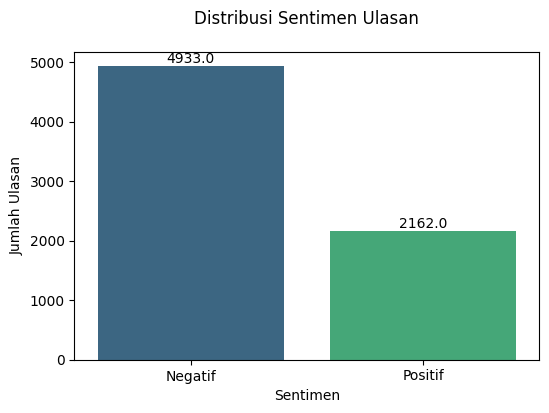


Membuat vektor TF-IDF...

Melatih model SVM...

=== Hasil Evaluasi ===
Akurasi: 0.84

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.89      0.88      0.89       987
     Positif       0.74      0.76      0.75       432

    accuracy                           0.84      1419
   macro avg       0.82      0.82      0.82      1419
weighted avg       0.85      0.84      0.85      1419



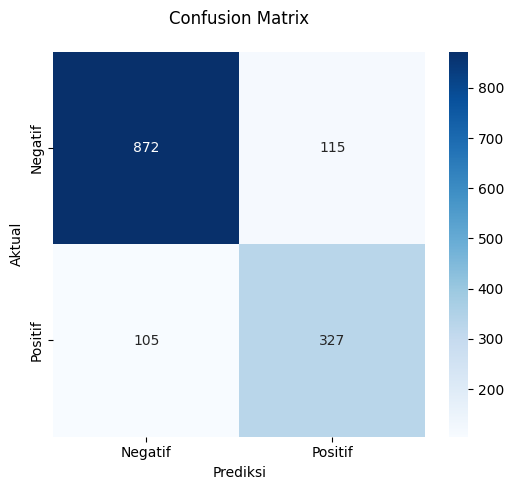


=== Analisis Kata Penting ===

10 Kata Paling Positif:
           word  importance
          bagus    3.563014
       membantu    2.821331
         mantap    2.544673
       terbantu    2.357838
         semoga    2.317331
          tunai    2.219790
       download    2.193849
sangat membantu    2.188142
           suka    2.174949
       saat ini    2.144449

10 Kata Paling Negatif:
        word  importance
     padahal   -2.891743
      kecewa   -2.616037
       parah   -2.357245
       buruk   -2.324343
       tidak   -2.255168
     mending   -2.202455
       jelek   -2.140596
sangat tidak   -2.137031
      daftar   -2.102795
       makin   -2.069206


/tmp/ipython-input-48-1376184969.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=top_negative.sort_values('importance'), palette='Reds')


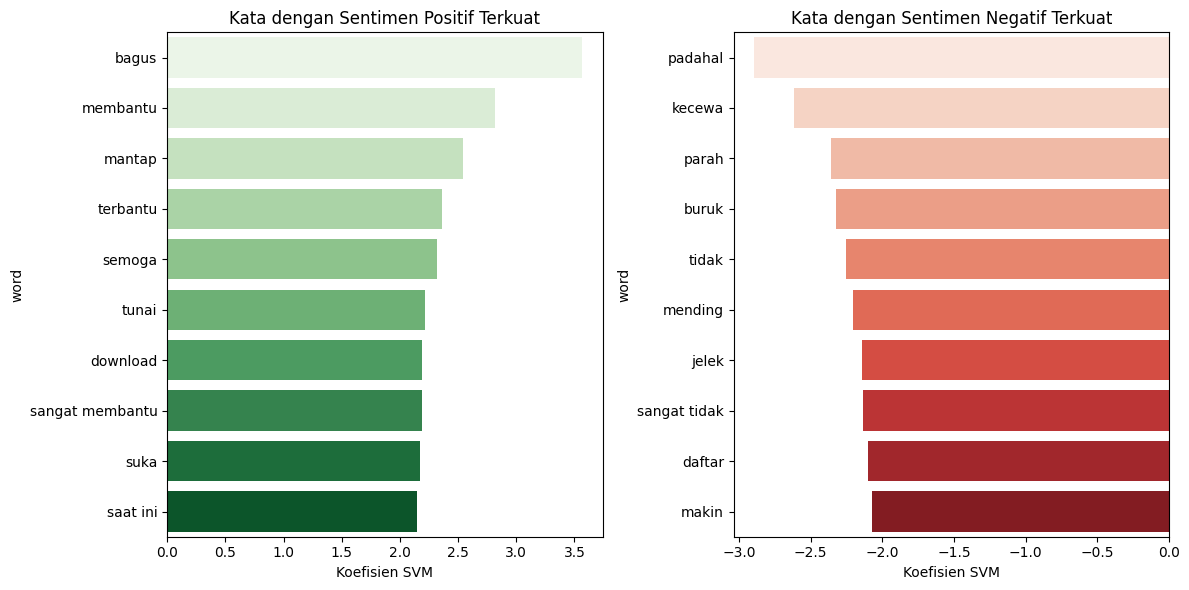


=== Distribusi Sentimen Hasil Prediksi ===
predicted_sentiment
0    4814
1    2281
Name: count, dtype: int64


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
import string

# Visualisasi distribusi sentimen
plt.figure(figsize=(6, 4))
# Create a 'sentiment' column based on the 'score'
# Assuming scores 4 and 5 are Positive (1), and scores 1 and 2 are Negative (0)
# You can adjust the mapping based on your needs
data['sentiment'] = data['score'].apply(lambda score: 1 if score >= 4 else (0 if score <= 2 else None))

# Drop rows where sentiment is None (e.g., score 3) if you want to exclude neutral reviews
data.dropna(subset=['sentiment'], inplace=True)

# Convert sentiment to integer type
data['sentiment'] = data['sentiment'].astype(int)
ax = sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Distribusi Sentimen Ulasan', pad=20)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.xticks([0, 1], ['Negatif', 'Positif'])

# Tambah label jumlah di atas bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.show()

# Split data
X = data['cleaned_review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Pertahankan distribusi kelas
)

# TF-IDF Vectorizer
print("\nMembuat vektor TF-IDF...")
tfidf = TfidfVectorizer(
    max_features=3000,
    min_df=5,
    max_df=0.8,
    ngram_range=(1, 2),
    sublinear_tf=True
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train SVM
print("\nMelatih model SVM...")
svm = SVC(
    kernel='linear',
    C=1,
    class_weight='balanced',  # Handle class imbalance
    probability=True,
    random_state=42
)
svm.fit(X_train_tfidf, y_train)

# Evaluasi
y_pred = svm.predict(X_test_tfidf)
y_proba = svm.predict_proba(X_test_tfidf)

print("\n=== Hasil Evaluasi ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negatif', 'Positif']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Positif'],
            yticklabels=['Negatif', 'Positif'])
plt.title('Confusion Matrix', pad=20)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Analisis Kata Penting
print("\n=== Analisis Kata Penting ===")
feature_names = tfidf.get_feature_names_out()
coefs = svm.coef_.toarray()[0]

# DataFrame untuk kata penting
word_importance = pd.DataFrame({
    'word': feature_names,
    'importance': coefs
}).sort_values('importance', ascending=False)

# Kata penting positif
top_positive = word_importance.head(10)
print("\n10 Kata Paling Positif:")
print(top_positive[['word', 'importance']].to_string(index=False))

# Kata penting negatif
top_negative = word_importance.tail(10)
print("\n10 Kata Paling Negatif:")
print(top_negative[['word', 'importance']].sort_values('importance').to_string(index=False))

# Visualisasi kata penting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='importance', y='word', data=top_positive, palette='Greens')
plt.title('Kata dengan Sentimen Positif Terkuat')
plt.xlabel('Koefisien SVM')

plt.subplot(1, 2, 2)
sns.barplot(x='importance', y='word', data=top_negative.sort_values('importance'), palette='Reds')
plt.title('Kata dengan Sentimen Negatif Terkuat')
plt.xlabel('Koefisien SVM')
plt.tight_layout()
plt.show()

# Prediksi pada seluruh data
data['predicted_sentiment'] = svm.predict(tfidf.transform(data['cleaned_review']))
data['predicted_proba'] = svm.predict_proba(tfidf.transform(data['cleaned_review']))[:, 1]

# Hasil akhir
print("\n=== Distribusi Sentimen Hasil Prediksi ===")
result_counts = data['predicted_sentiment'].value_counts()
print(result_counts)